In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 kB 19.6 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824028 sha256=51360c5d64c2c913a93948c648ad5f0a24e1eb3aa907cca664add66920bbf9d7
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("fifa2018").getOrCreate()


In [ ]:
df = spark.read.csv("/content/FIFA18.csv", inferSchema = True, header = True) 
df.show()

+------------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|SerialNumber|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK d

In [ ]:
df.show(10) # view the first 10 rows
df.printSchema() # print the schema
df.describe().show() # view summary statis
df.groupBy("Club").count().show() # count the number of players in each position


+------------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+---------+
|SerialNumber|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick acc

In [ ]:
df.filter(df["Nationality"] == "Argentina").show() # view all players from Argentina
df.filter(df["Overall"] > 90).show() # view all players with an overall rating greater than 90
df.filter(df["Club"] == "Real Madrid").show() # view all players on Real Madrid


+------------+-------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+---------+
|SerialNumber|         Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK

In [ ]:
df.groupBy("Nationality").agg({"Overall": "mean"}).orderBy("avg(Overall)", ascending=False).show() # view the average overall rating for each country, ordered by highest to lowest
df.groupBy("Club").agg({"Overall": "mean"}).orderBy("avg(Overall)", ascending=False).show() # view the average overall rating for each club, ordered by highest to lowest
df.filter(df["Age"] == "ST").groupBy("Club").agg({"Overall": "mean"}).orderBy("avg(Overall)", ascending=False).show() # view the average overall rating for each club's strikers, ordered by highest to lowest


+--------------+-----------------+
|   Nationality|     avg(Overall)|
+--------------+-----------------+
|          Cuba|             73.0|
|          Oman|             73.0|
|         Syria|             72.5|
|    Mozambique|72.33333333333333|
|     Guatemala|             72.0|
|        Israel|71.16666666666667|
|          Togo|             71.0|
|       Eritrea|             71.0|
|       Algeria|70.94736842105263|
|         Chile|           70.896|
|        Brazil|70.89532019704434|
|       Belarus|70.77777777777777|
|      Portugal|70.59945504087193|
|       Ecuador|70.51351351351352|
|         Gabon|             70.5|
|        Serbia|70.44360902255639|
|Czech Republic|70.17808219178082|
|       Ukraine|70.04081632653062|
|         Egypt|         69.96875|
|         Spain|69.93915603532875|
+--------------+-----------------+
only showing top 20 rows

+--------------------+-----------------+
|                Club|     avg(Overall)|
+--------------------+-----------------+
|        FC

In [ ]:
df = spark.read.csv("/content/FIFA18.csv", inferSchema = True, header = True) 
df.show()

from pyspark.sql.functions import mean, col
# Select the columns that need to be filled with missing values
cols_to_fill = ['Age', 'Overall', 'Potential', 'Special', 'Acceleration', 'Agility', 'Balance',
                'Composure', 'Crossing', 'Curve', 'Dribbling', 'GK Diving', 'GK Handling', 'GK Kicking', 
                'GK Positioning', 'GK Reflexes', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Interceptions',
                'Free kick accuracy', 'Long passing', 'Ball control', 'Jumping', 'Marking', 'Long Shots', 
                'Penalties', 'Positioning', 'Reactions', 'Shot power', 'Standing tackle', 'Sliding tackle', 
                'Sprint speed', 'Aggression', 'Stamina', 'Strength', 'Vision', 'CAM', 'CB', 'CDM', 'CF', 'CM', 
                'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 
                'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'Finishing']

# Fill missing values with the column mean
for col_name in cols_to_fill:
    col_mean = df.select(mean(col(col_name))).collect()[0][0]
    df = df.na.fill(col_mean, [col_name])

+------------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|SerialNumber|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK d

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def value_and_wage_conversion(value):
    if isinstance(value, str):
        out = value.replace('€', '')
        if 'M' in out:
            out = float(out.replace('M', ''))*1000000
        elif 'K' in out:
            out = float(out.replace('K', ''))*1000
        return float(out)
    
value_and_wage_conversion_udf = udf(value_and_wage_conversion, FloatType())

df = df.withColumn('Value', value_and_wage_conversion_udf('Value'))
df = df.withColumn('Wage', value_and_wage_conversion_udf('Wage'))

In [ ]:
from pyspark.sql.functions import when, col

df = df.withColumn("Club", when(col("Club") == "", "No Club").otherwise(col("Club")))
df = df.withColumn("Preferred Positions", when(col("Preferred Positions") == "", "unknown").otherwise(col("Preferred Positions")))


In [ ]:
#Function to convert skill rating at each position.
def skillConverter(val):
  if type(val) == str:
    s1 = val[0:2]
    s2 = val[-1]
    val = int(s1) + int(s2)
    return val
  else:
   return val

skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

skillConverter_udf = udf(skillConverter, DoubleType())

for col in skill_columns:
  df = df.withColumn(col, skillConverter_udf(col))
  df = df.fillna({col: 0.0})
df.show(5)

+------------+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+--------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+---+---+---+---+---+------+---+---+---+---+---+---+---+---+---+---+-------------------+---+---+---+---+---+---+---+---+---+---+---+
|SerialNumber|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value|    Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK

In [ ]:
from pyspark.sql.functions import isnan, count

# Count the number of null values in each column
null_counts = df.select([count(isnan(c)).alias(c) for c in df.columns])

# Show the null counts
null_counts.show()


+------------+-----+-----+-----+-----------+-----+-------+---------+-----+---------+-----+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-------------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+
|SerialNumber| Name|  Age|Photo|Nationality| Flag|Overall|Potential| Club|Club Logo|Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing

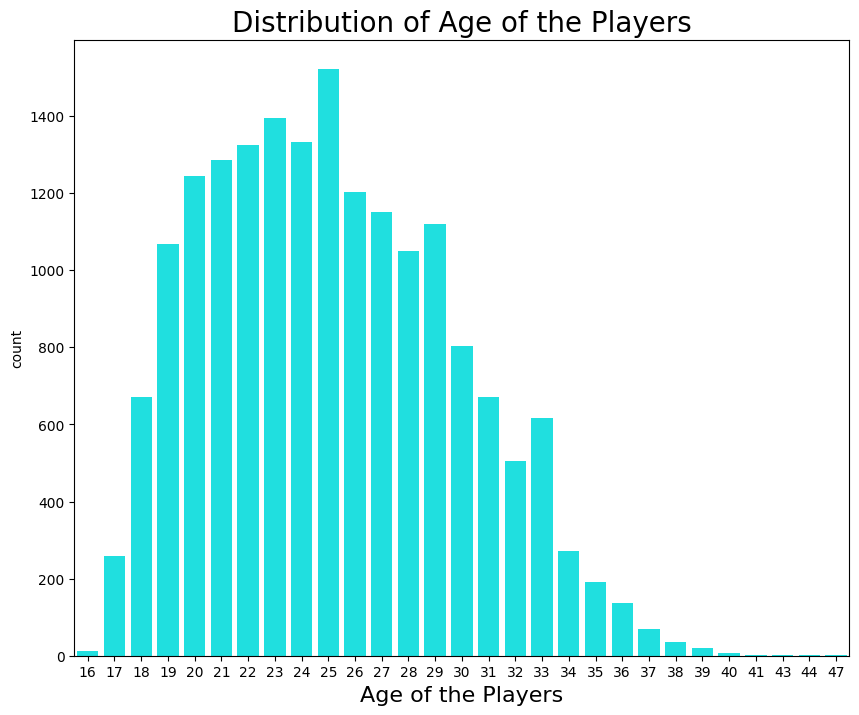

In [ ]:
from pyspark.sql.functions import count
import matplotlib.pyplot as plt
import seaborn as sns
age_counts = df.groupBy('Age').agg(count('*').alias('count')).orderBy('Age')
age_counts_pd = age_counts.toPandas()

plt.figure(figsize=(10,8))
ax = sns.barplot(x='Age', y='count', data=age_counts_pd, color='#00ffff')
ax.set_xlabel(xlabel='Age of the Players', fontsize=16)
ax.set_title(label='Distribution of Age of the Players', fontsize=20)
plt.show()


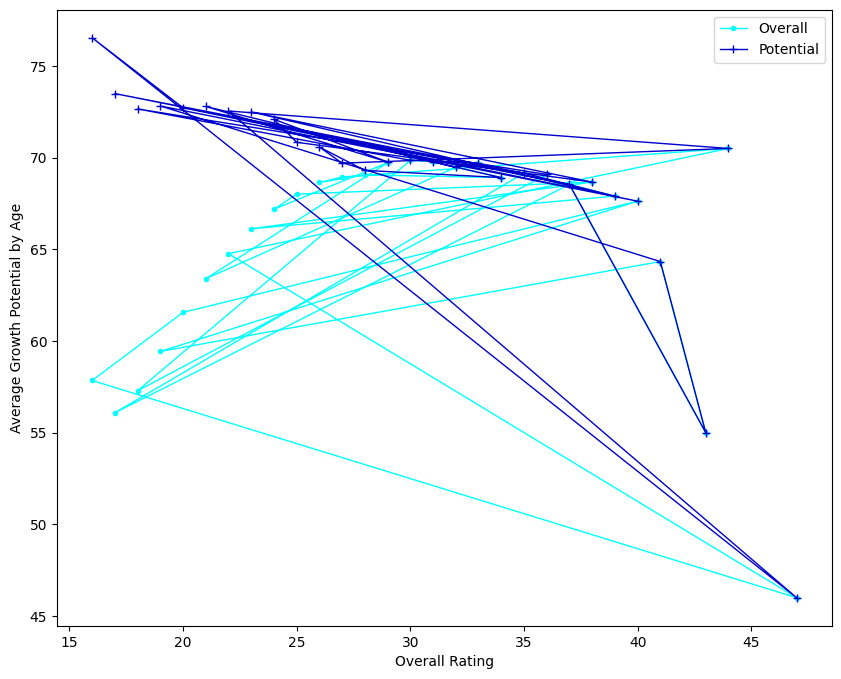

In [ ]:
from pyspark.sql.functions import avg

overall = df.groupBy('Age').agg(avg('Overall').alias('Overall'))
potential = df.groupBy('Age').agg(avg('Potential').alias('Potential'))

merged = overall.join(potential, on='Age', how='inner')

fig, ax = plt.subplots(figsize=(10,8))

merged_pd = merged.toPandas()

plt.plot('Age', 'Overall', data=merged_pd, marker='.', color='#00ffff', lw=1, label ="Overall" )
plt.plot('Age', 'Potential', data=merged_pd, marker='+', color='#0000cc', lw=1, label = "Potential")
plt.xlabel('Overall Rating')
plt.ylabel('Average Growth Potential by Age')
plt.legend();

In [ ]:
from pyspark.sql.functions import avg

club = (df.groupBy('Club')
        .agg(avg('Overall').alias('Overall'))
        .orderBy('Overall', ascending=False)
        .limit(20)
        .toPandas())
import plotly.express as px
fig = px.bar(club, x='Overall', y='Club', orientation='h')
fig.show()


#Feature Engineering 

In [ ]:
from pyspark.sql.functions import when, count, col
nat_counts = df.groupBy('Nationality').agg(count('*').alias('count')).filter(col('count') > 250)
nat_list = nat_counts.select('Nationality').rdd.flatMap(lambda x: x).collect()
df = df.withColumn('Major_Nation', when(col('Nationality').isin(nat_list), 1).otherwise(0))

In [ ]:
from pyspark.sql.functions import when, col

df_simple_position = df.withColumn(
"Simple_Position",
when(col("Preferred Positions").isin(["GK"]), "GK")
.when(col("Preferred Positions").isin(["RB", "LB", "CB", "LCB", "RCB", "RWB", "LWB"]), "DF")
.when(col("Preferred Positions").isin(["LDM", "CDM", "RDM"]), "DM")
.when(col("Preferred Positions").isin(["LM", "LCM", "CM", "RCM", "RM", "LAM", "CAM", "RAM", "LW", "RW"]), "MF")
.when(col("Preferred Positions").isin(["RS", "ST", "LS", "CF", "LF", "RF"]), "ST")
.otherwise(col("Preferred Positions"))
)
#df['Simple_Position'] = df.apply(simple_position,axis = 1)

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define the UDF
simple_position_udf = udf(lambda pos: simple_position(pos), StringType())

# Apply the UDF on the dataframe
df = df.withColumn("Simple_Position", simple_position_udf("Preferred Positions"))


In [ ]:
from pyspark.sql.functions import col

df = df.drop(*['Name', 'Nationality', 'Club', 'Wage', 'Preferred Foot', 'Work Rate', 'Position', 'Joined',
               'Contract Valid Until', 'Release Clause', 'year'])


#Encoding



```
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType

# Define the simple_position function
def simple_position(position):
    if position == 'GK':
        return 2
    elif position in ['RB', 'LB', 'CB', 'LCB', 'RCB', 'RWB', 'LWB']:
        return 4
    elif position in ['LDM', 'CDM', 'RDM']:
        return 5
    elif position in ['LM', 'LCM', 'CM', 'RCM', 'RM']:
        return 3
    elif position in ['LAM', 'CAM', 'RAM', 'LW', 'RW']:
        return 1
    elif position in ['RS', 'ST', 'LS', 'CF', 'LF', 'RF']:
        return 0
    else:
        return 6

# Create the user-defined function
simple_position_udf = udf(simple_position, IntegerType())

# Apply the user-defined function to the column and create a new column with the result
df = df.withColumn('Simple_Position', simple_position_udf('Simple_Position'))

```



In [ ]:
from pyspark.sql.functions import when

simple_position_map = {
    'ST': 0,
    'AM': 1,
    'GK': 2,
    'MF': 3,
    'DF': 4,
    'DM': 5,
    'unknown': 6
}

df = df.withColumn('Simple_Position', 
                   when(df.Simple_Position == 'ST', simple_position_map['ST'])
                   .when(df.Simple_Position == 'AM', simple_position_map['AM'])
                   .when(df.Simple_Position == 'GK', simple_position_map['GK'])
                   .when(df.Simple_Position == 'MF', simple_position_map['MF'])
                   .when(df.Simple_Position == 'DF', simple_position_map['DF'])
                   .when(df.Simple_Position == 'DM', simple_position_map['DM'])
                   .when(df.Simple_Position.isNull(), simple_position_map['unknown'])
                   .otherwise(df.Simple_Position))


In [ ]:
from pyspark.sql.functions import when

def simple_position(position):
    if position == 'GK':
        return 'GK'
    elif position in ['RB', 'LB', 'CB', 'LCB', 'RCB', 'RWB', 'LWB']:
        return 'DF'
    elif position in ['LDM', 'CDM', 'RDM']:
        return 'DM'
    elif position in ['LM', 'LCM', 'CM', 'RCM', 'RM', 'LAM', 'CAM', 'RAM', 'LW', 'RW']:
        return 'MF'
    elif position in ['RS', 'ST', 'LS', 'CF', 'LF', 'RF']:
        return 'ST'
    else:
        return position

simple_position_udf = udf(simple_position)

df = df.withColumn('Simple_Position', simple_position_udf(df['Preferred Positions']))
df.show(5)


+------------+---+--------------------+--------------------+-------+---------+--------------------+------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+---+---+---+---+---+------+---+---+---+---+---+---+---+---+---+---+-------------------+---+---+---+---+---+---+---+---+---+---+---+------------+---------------+
|SerialNumber|Age|               Photo|                Flag|Overall|Potential|           Club Logo| Value|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|L

In [ ]:
df.columns

['SerialNumber',
 'Age',
 'Photo',
 'Flag',
 'Overall',
 'Potential',
 'Club Logo',
 'Value',
 'Special',
 'Acceleration',
 'Aggression',
 'Agility',
 'Balance',
 'Ball control',
 'Composure',
 'Crossing',
 'Curve',
 'Dribbling',
 'Finishing',
 'Free kick accuracy',
 'GK diving',
 'GK handling',
 'GK kicking',
 'GK positioning',
 'GK reflexes',
 'Heading accuracy',
 'Interceptions',
 'Jumping',
 'Long passing',
 'Long shots',
 'Marking',
 'Penalties',
 'Positioning',
 'Reactions',
 'Short passing',
 'Shot power',
 'Sliding tackle',
 'Sprint speed',
 'Stamina',
 'Standing tackle',
 'Strength',
 'Vision',
 'Volleys',
 'CAM',
 'CB',
 'CDM',
 'CF',
 'CM',
 'ID',
 'LAM',
 'LB',
 'LCB',
 'LCM',
 'LDM',
 'LF',
 'LM',
 'LS',
 'LW',
 'LWB',
 'Preferred Positions',
 'RAM',
 'RB',
 'RCB',
 'RCM',
 'RDM',
 'RF',
 'RM',
 'RS',
 'RW',
 'RWB',
 'ST',
 'Major_Nation',
 'Simple_Position']

In [ ]:
X_cols = df[['Age','Overall', 'Potential','Special','Crossing', 'Finishing', 'Heading accuracy', 
          'Short passing', 'Volleys','Dribbling', 'Curve', 'Free kick accuracy', 'Long passing', 
          'Ball control','Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
          'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
          'Aggression', 'Interceptions', 'Preferred Positions', 'Vision', 'Penalties',
          'Composure', 'Marking', 'Standing tackle', 'Sliding tackle', 'GK diving',
          'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
          'Major_Nation']]

y = df.selectExpr("log1p(Value) as log_Value")


In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import log1p
import numpy as np
import seaborn as sns
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import col, log1p

# select columns and rename them
X_cols = ['Age','Overall', 'Potential','Special','Crossing', 'Finishing', 'Heading accuracy', 
          'Short passing', 'Volleys','Dribbling', 'Curve', 'Free kick accuracy', 'Long passing', 
          'Ball control','Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
          'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
          'Aggression', 'Interceptions', 'Preferred Positions', 'Vision', 'Penalties',
          'Composure', 'Marking', 'Standing tackle', 'Sliding tackle', 'GK diving',
          'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
          'Major_Nation']


X = df.select(X_cols)

# apply log transformation to target variable
y = df.select(log1p(col("Value")))


# select relevant columns
X_cols = df.select(X_cols)

# convert string columns to numeric
for col in ['Crossing', 'Finishing', 'Heading accuracy', 'Short passing', 'Volleys', 'Dribbling', 'Curve', 'Free kick accuracy', 'Long passing', 'Ball control','Acceleration', 'Sprint speed', 'Agility',
            'Reactions', 'Balance','Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots', 'Aggression', 'Interceptions', 'Preferred Positions', 'Vision', 'Penalties', 'Composure','Marking',
            'Standing tackle', 'Sliding tackle', 'GK diving', 'GK handling','GK kicking', 'GK positioning', 'GK reflexes']:
    X_cols = X_cols.withColumn(col, X_cols[col].cast('float'))

# apply log transformation to target variable
y = df.selectExpr('log1p(Value) as log_Value')

# create a vector assembler
assembler = VectorAssembler(inputCols=X_cols.columns, outputCol="features")
X = assembler.transform(X_cols).select("features")

if "features" in X.columns:
    X = X.drop("features")

# create a vector assembler
assembler = VectorAssembler(inputCols=X.columns, outputCol="features")
X_transformed = assembler.transform(X)

# fit a linear regression model
lr = LinearRegression(featuresCol="features", labelCol=y.columns[0])


# create a SQL transformer to apply log transformation to target variable
from pyspark.ml.feature import SQLTransformer

from pyspark.sql.functions import col

col_names = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

for col_name in col_names:
    df = df.withColumn(col_name, col(col_name).cast('float'))


sqlTrans = SQLTransformer(
    statement="SELECT *, log1p(Value) as log_Value FROM __THIS__")

# apply SQL transformer and drop original Value column
fifa_log = sqlTrans.transform(df).drop("Value")

# create X and y variables
X = fifa_log.select(['Age','Overall', 'Potential','Special','Crossing', 'Finishing', 'Heading accuracy', 
          'Short passing', 'Volleys','Dribbling', 'Curve', 'Free kick accuracy', 'Long passing', 
          'Ball control','Acceleration', 'Sprint speed', 'Agility', 'Reactions', 'Balance',
          'Shot power', 'Jumping', 'Stamina', 'Strength', 'Long shots',
          'Aggression', 'Interceptions', 'Preferred Positions', 'Vision', 'Penalties',
          'Composure', 'Marking', 'Standing tackle', 'Sliding tackle', 'GK diving',
          'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
          'Major_Nation'])

y = fifa_log.select('log_Value')

# create a vector assembler
assembler = VectorAssembler(inputCols=X.columns, outputCol="features")
X_transformed = assembler.transform(X)

# fit a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="log_Value")
model = lr.fit(X_transformed)

# display the distribution of the target variable
sns.distplot(y.toPandas(), kde=False)


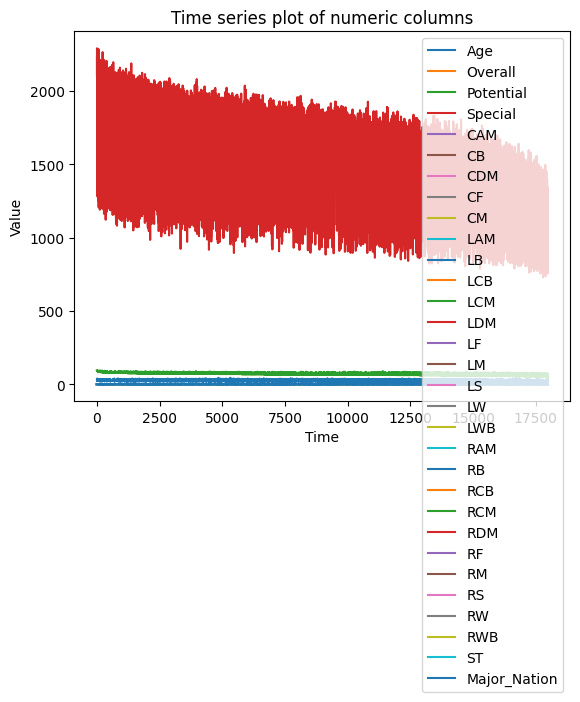

In [ ]:
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
df = df.drop('Id')

# filter out non-numeric columns
numeric_cols = [c for c,t in df.dtypes if t in ['int', 'double']]
df_numeric = df.select(numeric_cols[1:]) # exclude the first column

# define list of columns to plot
columns_to_plot = df_numeric.columns

# plot each column as a line plot
for column in columns_to_plot:
    data = [float(row[column]) for row in df_numeric.select(column).collect()]
    plt.plot(data, label=column)

# set plot title and labels
plt.title('Time series plot of numeric columns')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

# display the plot
plt.show()


In [ ]:
df.show(5)

+------------+---+--------------------+--------------------+-------+---------+--------------------+------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+-------------------+---+---+---+---+---+---+---+---+---+---+---+------------+---------------+
|SerialNumber|Age|               Photo|                Flag|Overall|Potential|           Club Logo| Value|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|Long sho

In [ ]:
df = df.drop('SerialNumber','Photo','Flag','Club Logo','CAM', 'CB','CDM', 'CF', 'CM','LAM', 'LB','LCB','LCM','LDM', 'LF', 'LM', 'LS', 'LW','LWB','RAM','RB','RCB','RCM','RDM', 'RF', 'RM', 'RS', 'RW','RWB', 'ST')


In [ ]:
df.show(5)

+---+-------+---------+------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+-------------------+------------+---------------+
|Age|Overall|Potential| Value|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|Long shots|Marking|Penalties|Positioning|Reactions|Short passing|Shot power|Sliding tackle|Sprint speed|Stamina|Standing tackle|Strength|Vision|Volleys|Preferred Positions|Major_Nation|Simple_Position|
+---+-------+---------+------+-------+------------+----------+

In [ ]:
from pyspark.sql.functions import col, log1p
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression

col_names = ['Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
             'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 
             'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
             'GK positioning', 'GK reflexes', 'Heading accuracy', 
             'Interceptions', 'Jumping', 'Long passing', 'Long shots', 
             'Marking', 'Penalties', 'Positioning', 'Reactions', 
             'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 
             'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

# Cast all columns in col_names to float
for col_name in col_names:
    df = df.withColumn(col_name, col(col_name).cast("float"))

# Apply log transformation to target variable
df = df.withColumn("log_Value", log1p(df["Value"]))

# Remove any rows that have missing data
df = df.dropna()

# Create a vector assembler
assembler = VectorAssembler(inputCols=col_names, outputCol="features")
X_transformed = assembler.transform(df)

# Fit a linear regression model
lr = LinearRegression(featuresCol="features", labelCol="log_Value")
model = lr.fit(X_transformed)

# Display the distribution of the target variable
df.select("log_Value").show()


+------------------+
|         log_Value|
+------------------+
|18.374636815922162|
| 18.46947091764561|
|18.627694921466773|
|18.390221546776935|
|17.926384438531027|
| 18.33729914588288|
| 17.98217579726988|
|18.320860419719878|
|18.184958423089522|
| 18.15931599280497|
| 17.76675429577647|
|18.234351177809064|
|17.893048018819147|
| 18.02763817065757|
|17.858561843342684|
| 18.05683732492351|
|18.012712520663676|
|17.453096744006448|
|15.319588176962746|
|18.184958423089522|
+------------------+
only showing top 20 rows



In [ ]:
# create a vector assembler to combine the features into a single vector
assembler = VectorAssembler(inputCols=['Age', 'Overall', 'Potential', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys'], outputCol="new_features")
# transform the data using the vector assembler
data = assembler.transform(df)
# split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3])
# split the data into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3])
data.show(5)

+---+-------+---------+------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+-------------------+------------+---------------+------------------+--------------------+
|Age|Overall|Potential| Value|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|Long shots|Marking|Penalties|Positioning|Reactions|Short passing|Shot power|Sliding tackle|Sprint speed|Stamina|Standing tackle|Strength|Vision|Volleys|Preferred Positions|Major_Nation|Simple_Position|         log_Value|    

In [ ]:
df = df.fillna(0)
df = df.drop('new_features','features')
df.show(5)

+---+-------+---------+------+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+-------------------+------------+---------------+------------------+
|Age|Overall|Potential| Value|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kicking|GK positioning|GK reflexes|Heading accuracy|Interceptions|Jumping|Long passing|Long shots|Marking|Penalties|Positioning|Reactions|Short passing|Shot power|Sliding tackle|Sprint speed|Stamina|Standing tackle|Strength|Vision|Volleys|Preferred Positions|Major_Nation|Simple_Position|         log_Value|
+---+-------+---------+-

In [ ]:
model_df = df.select(col("Age"), col("Overall"), col("Dribbling"), col("Major_Nation"), col("Simple_Position"), col("log_Value"))
model_df.show(5)
model_df = model_df.fillna(0)
from pyspark.sql.functions import when
model_df = df.withColumn("Simple_Position", when(df.Simple_Position.isNull(), "unknown").otherwise(df.Simple_Position))
model_df = model_df.dropna()

+---+-------+---------+------------+---------------+------------------+
|Age|Overall|Dribbling|Major_Nation|Simple_Position|         log_Value|
+---+-------+---------+------------+---------------+------------------+
| 32|     94|     91.0|           1|         ST LW |18.374636815922162|
| 30|     93|     97.0|           1|            RW | 18.46947091764561|
| 25|     92|     96.0|           1|            LW |18.627694921466773|
| 30|     92|     86.0|           0|            ST |18.390221546776935|
| 31|     92|     30.0|           1|            GK |17.926384438531027|
+---+-------+---------+------------+---------------+------------------+
only showing top 5 rows



In [ ]:
model_df = df.select(col("Age"), col("Overall"), col("Dribbling"), col("Major_Nation"), col("Simple_Position"), col("log_Value"))
model_df.show(5)

+---+-------+---------+------------+---------------+------------------+
|Age|Overall|Dribbling|Major_Nation|Simple_Position|         log_Value|
+---+-------+---------+------------+---------------+------------------+
| 32|     94|     91.0|           1|         ST LW |18.374636815922162|
| 30|     93|     97.0|           1|            RW | 18.46947091764561|
| 25|     92|     96.0|           1|            LW |18.627694921466773|
| 30|     92|     86.0|           0|            ST |18.390221546776935|
| 31|     92|     30.0|           1|            GK |17.926384438531027|
+---+-------+---------+------------+---------------+------------------+
only showing top 5 rows



In [ ]:
model_df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Dribbling: float (nullable = false)
 |-- Major_Nation: integer (nullable = false)
 |-- Simple_Position: string (nullable = true)
 |-- log_Value: double (nullable = false)



Accuracy: 0.7933269780743565


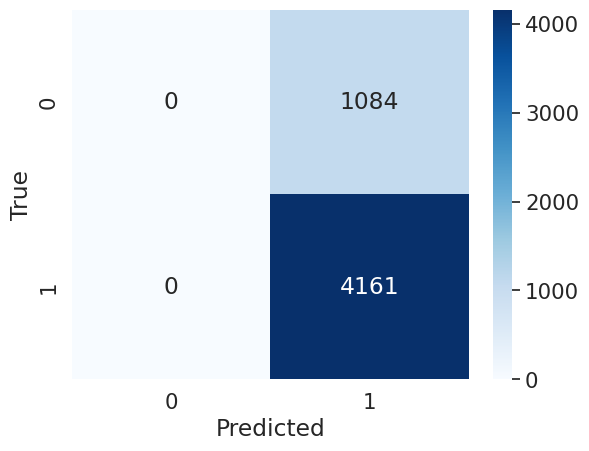

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

data = model_df
# Assuming your data is in a DataFrame named 'data'
# Split data into training and test sets
(train_data, test_data) = data.randomSplit([0.7, 0.3], seed=123)

# Define the assembler and classifier
assembler = VectorAssembler(inputCols=['Age', 'Overall', 'Dribbling'], outputCol='features')
classifier = DecisionTreeClassifier(labelCol='Major_Nation', featuresCol='features')

# Define the pipeline
pipeline = Pipeline(stages=[assembler, classifier])

# Fit the pipeline object to the data
model = pipeline.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the performance of the model
evaluator = MulticlassClassificationEvaluator(labelCol='Major_Nation', predictionCol='prediction', metricName='accuracy')
accuracy = evaluator.evaluate(predictions)
print('Accuracy:', accuracy)

# Plot the confusion matrix
y_true = predictions.select(['Major_Nation']).collect()
y_pred = predictions.select(['prediction']).collect()
cm = confusion_matrix(y_true, y_pred)

sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Assuming your data is in a DataFrame named 'data'
data = model_df
# Select the columns to use as features and target variable
feature_cols = ['Age', 'Overall', 'Dribbling']
target_col = 'Major_Nation'

# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
data = assembler.transform(data)

# Split the data into training and test sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

# Create a Logistic Regression model
lr = LogisticRegression(featuresCol='features', labelCol=target_col)

# Fit the model to the training data
model = lr.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model using the BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(rawPredictionCol='rawPrediction', labelCol=target_col)
auc = evaluator.evaluate(predictions)

# Print the AUC score
print(f'AUC score: {auc}')


AUC score: 0.5436174221167568


RMSE: 1.703180416632336
MAE: 0.47571268993555144
R-squared: 0.4023936204851659
Adjusted R-squared: 0.40204359722500493


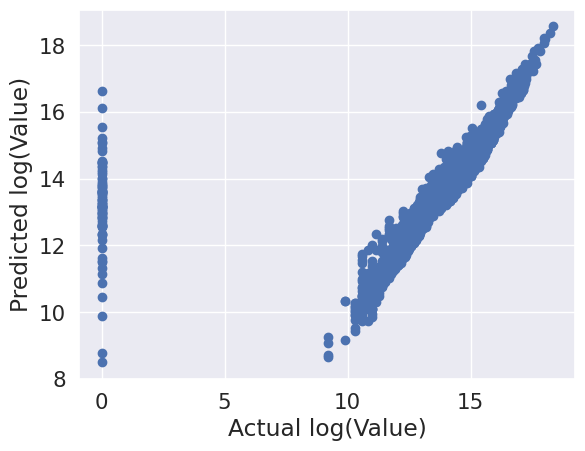

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Assuming your data is in a DataFrame named 'data'
data = model_df

# Split data into training and test sets
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Create a VectorAssembler object to combine features
assembler = VectorAssembler(inputCols=["Age", "Overall", "Dribbling"], outputCol="features")

# Create a LinearRegression object
lr = LinearRegression(featuresCol="features", labelCol="log_Value")

# Create a pipeline object
pipeline = Pipeline(stages=[assembler, lr])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions on test data
predictions = model.transform(testData)

# Evaluate the model using RMSE metric
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="log_Value", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Evaluate the model using MAE metric
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="log_Value", metricName="mae")
mae = evaluator.evaluate(predictions)

# Evaluate the model using R-squared metric
evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="log_Value", metricName="r2")
r2 = evaluator.evaluate(predictions)

# Evaluate the model using adjusted R-squared metric
n = testData.count()
p = len(assembler.getInputCols())
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

# Print evaluation metrics
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

# Plot actual vs. predicted values
actual = predictions.select("log_Value").toPandas()
predicted = predictions.select("prediction").toPandas()
plt.scatter(actual, predicted)
plt.xlabel("Actual log(Value)")
plt.ylabel("Predicted log(Value)")
plt.show()


In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import NaiveBayes
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Assuming your data is in a DataFrame named 'data'
data = model_df

# Convert categorical variables to numerical using StringIndexer and OneHotEncoder
indexer = StringIndexer(inputCol="Simple_Position", outputCol="Simple_Position_indexed")
encoder = OneHotEncoder(inputCol="Simple_Position_indexed", outputCol="Simple_Position_encoded")
assembler = VectorAssembler(inputCols=["Age", "Overall", "Dribbling", "Simple_Position_encoded"], outputCol="features")

# Split data into training and test sets
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed=42)

# Create a NaiveBayes object
nb = NaiveBayes(featuresCol="features", labelCol="Major_Nation")

# Create a pipeline object
pipeline = Pipeline(stages=[indexer, encoder, assembler, nb])

# Train the model
model = pipeline.fit(trainingData)

# Make predictions on test data
predictions = model.transform(testData)

# Evaluate the model using accuracy and F1-score metrics
evaluator_acc = MulticlassClassificationEvaluator(labelCol="Major_Nation", predictionCol="prediction", metricName="accuracy")

evaluator_f1 = MulticlassClassificationEvaluator(labelCol="Major_Nation", predictionCol="prediction", metricName="f1")


In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession

# Stop the existing SparkContext, if any
try:
    sc.stop()
except:
    pass

# Create a new SparkContext
sc = SparkContext('local')
spark = SparkSession(sc)

USING PYSPARK

FEATURE ENGINEERING

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, lit

In [ ]:
spark = SparkSession.builder.appName("CombineNames").getOrCreate()

In [ ]:
df = spark.read.csv("/content/players_18.csv", header=True, inferSchema=True)

In [ ]:
df.columns

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [ ]:
df = df.drop("long_name", "short_name")

In [ ]:
df.show(5)

+---------+--------------------+----------------+-------+---------+---------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+--------------------+-----------------------

In [ ]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("SelectRows").getOrCreate()

# read the dataset as a DataFrame
df = spark.read.csv("/content/players_18.csv", header=True, inferSchema=True)

# select the first 10,000 rows and create a new DataFrame
df_new = df.limit(10000)

# show the first 5 rows of the new DataFrame
df_new.show(5)

+---------+--------------------+-----------------+--------------------+----------------+-------+---------+---------+--------+---+-------------------+---------+---------+------------+-------------------+--------------------+------------+-------------+------------------+----------------+-------------------+-------------------------+--------------+----------------+--------------+---------------+--------------------+--------------+---------+-----------+------------------------+-------------+----------------+---------+------------------+--------------------+--------------------+----+--------+-------+---------+---------+------+------------------+-------------------+--------------------------+-----------------------+-----------------+---------------+-----------+-----------------+------------------+------------------+---------------------+---------------------+----------------+------------------+----------------+----------------+-------------+-------------+--------------+----------------+-----

In [ ]:
df_new.printSchema()

root
 |-- sofifa_id: integer (nullable = true)
 |-- player_url: string (nullable = true)
 |-- short_name: string (nullable = true)
 |-- long_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: integer (nullable = true)
 |-- potential: integer (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: integer (nullable = true)
 |-- dob: timestamp (nullable = true)
 |-- height_cm: integer (nullable = true)
 |-- weight_kg: integer (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: integer (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: integer (nullable = true)
 |-- club_loaned_from: string (nullable = true)
 |-- club_joined: timestamp (nullable = true)
 |-- club_contract_valid_until: integer (nullable = true)
 |-- nationality_id: integer (nullable

In [ ]:
num_rows = df_new.count()
num_cols = len(df_new.columns)
print("Shape: ({}, {})".format(num_rows, num_cols))

Shape: (10000, 110)


In [ ]:
# Import necessary modules
from pyspark.sql.functions import col

# Define the columns to drop
unwanted_cols = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 
                 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 
                 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 
                 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 
                 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 
                 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 
                 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 
                 'rcb', 'rb', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 
                 'nation_flag_url']

# Drop the unwanted columns
df_new = df.select([col(c) for c in df.columns if c not in unwanted_cols])
num_rows = df_new.count()
num_cols = len(df_new.columns)
print("Shape: ({}, {})".format(num_rows, num_cols))

Shape: (17954, 55)


In [ ]:
# Load the FIFA data into a PySpark dataframe
from pyspark.sql.functions import *

df = df_new
# Select the relevant columns
selected_cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation']

# Filter out missing values
df_clean = df.select(selected_cols).na.drop()

# Filter out incorrect data
df_clean = df_clean.filter((df_clean['height_cm'] > 0) & (df_clean['weight_kg'] > 0))

# Convert categorical variables to numerical
df_clean = df_clean.withColumn('preferred_foot_num', when(df_clean['preferred_foot'] == 'Right', 1).otherwise(0))
df_clean = df_clean.drop('preferred_foot')

# Show the cleaned dataframe
df_clean.show()

+-------+---------+---------+--------+---+---------+---------+---------+-----------+------------------------+------------------+
|overall|potential|value_eur|wage_eur|age|height_cm|weight_kg|weak_foot|skill_moves|international_reputation|preferred_foot_num|
+-------+---------+---------+--------+---+---------+---------+---------+-----------+------------------------+------------------+
|     94|       94|   9.55E7|575000.0| 32|      185|       80|        4|          5|                       5|                 1|
|     93|       93|   1.05E8|575000.0| 30|      170|       72|        4|          4|                       5|                 0|
|     92|       92|    6.1E7|225000.0| 31|      193|       92|        4|          1|                       5|                 1|
|     92|       92|    9.7E7|500000.0| 30|      182|       86|        4|          4|                       5|                 1|
|     92|       94|   1.23E8|275000.0| 25|      175|       68|        5|          5|             

In [ ]:
# Load the FIFA data into a PySpark dataframe
from pyspark.sql.functions import *

# Remove outliers using IQR method
q1 = df_clean.approxQuantile('height_cm', [0.25], 0.01)[0]
q3 = df_clean.approxQuantile('height_cm', [0.75], 0.01)[0]
iqr = q3 - q1
height_lower_bound = q1 - 1.5 * iqr
height_upper_bound = q3 + 1.5 * iqr

df_clean = df_clean.filter((df_clean['height_cm'] >= height_lower_bound) & (df_clean['height_cm'] <= height_upper_bound))

# Transform data using log transformation
df_clean = df_clean.withColumn('log_value_eur', log(df_clean['value_eur']))
df_clean = df_clean.drop('value_eur')

# Show the cleaned dataframe
df_clean.show()

+-------+---------+--------+---+---------+---------+---------+-----------+------------------------+------------------+------------------+
|overall|potential|wage_eur|age|height_cm|weight_kg|weak_foot|skill_moves|international_reputation|preferred_foot_num|     log_value_eur|
+-------+---------+--------+---+---------+---------+---------+-----------+------------------------+------------------+------------------+
|     94|       94|575000.0| 32|      185|       80|        4|          5|                       5|                 1|18.374636805450958|
|     93|       93|575000.0| 30|      170|       72|        4|          4|                       5|                 0|18.469470908121796|
|     92|       92|225000.0| 31|      193|       92|        4|          1|                       5|                 1|17.926384422137584|
|     92|       92|500000.0| 30|      182|       86|        4|          4|                       5|                 1|18.390221536467656|
|     92|       94|275000.0| 25|  

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
import time

# Create a vector assembler to combine the predictor columns into a feature vector
assembler = VectorAssembler(inputCols=['age', 'overall', 'potential', 'log_value_eur', 'wage_eur', 'international_reputation'], outputCol='features')

# Apply the vector assembler to the dataframe
df_assembled = assembler.transform(df_clean)

# Split the data into training and testing sets
(training_data, testing_data) = df_assembled.randomSplit([0.8, 0.2])

# Create a linear regression model
lr = LinearRegression(featuresCol='features', labelCol='log_value_eur')

# Time the training phase
start_time = time.time()
# Fit the model to the training data
model = lr.fit(training_data)
end_time = time.time()

# Calculate the time taken for training
training_time = end_time - start_time

# Time the prediction phase
start_time = time.time()
# Make predictions on the testing data
predictions = model.transform(testing_data)
end_time = time.time()

# Calculate the time taken for prediction
prediction_time = end_time - start_time

# Evaluate the performance of the model using the root mean squared error metric
evaluator = RegressionEvaluator(labelCol='log_value_eur', predictionCol='prediction', metricName='rmse')
rmse = evaluator.evaluate(predictions)

# Print the results
print('Root Mean Squared Error (RMSE):', rmse)
print('Training time:', training_time, 'seconds')
print('Prediction time:', prediction_time, 'seconds')

Root Mean Squared Error (RMSE): 0.0
Training time: 2.3083465099334717 seconds
Prediction time: 0.11918163299560547 seconds


In [ ]:
# Import necessary libraries
from pyspark.ml.evaluation import RegressionEvaluator
import time

# Make predictions on the test data
predictions = model.transform(testing_data)

# Calculate MAPE and R-squared
mape = predictions.selectExpr("mean(abs((log_value_eur-prediction)/log_value_eur))*100 as MAPE").collect()[0]['MAPE']
r2 = RegressionEvaluator(labelCol="log_value_eur", predictionCol="prediction", metricName="r2").evaluate(predictions)

# Calculate time taken to fit the model
start_time = time.time()
model = lr.fit(training_data)
end_time = time.time()
time_taken = end_time - start_time

# Print the results
print("MAPE: ", mape)
print("R-squared: ", r2)
print("Time taken: ", time_taken, " seconds")

MAPE:  0.0
R-squared:  1.0
Time taken:  2.8759520053863525  seconds


USING TRADITIONAL METHOD

In [ ]:
df

DataFrame[overall: int, potential: int, value_eur: double, wage_eur: double, age: int, dob: timestamp, height_cm: int, weight_kg: int, preferred_foot: string, weak_foot: int, skill_moves: int, international_reputation: int, work_rate: string, pace: int, shooting: int, passing: int, dribbling: int, defending: int, physic: int, attacking_crossing: int, attacking_finishing: int, attacking_heading_accuracy: int, attacking_short_passing: int, attacking_volleys: int, skill_dribbling: int, skill_curve: int, skill_fk_accuracy: int, skill_long_passing: int, skill_ball_control: int, movement_acceleration: int, movement_sprint_speed: int, movement_agility: int, movement_reactions: int, movement_balance: int, power_shot_power: int, power_jumping: int, power_stamina: int, power_strength: int, power_long_shots: int, mentality_aggression: int, mentality_interceptions: int, mentality_positioning: int, mentality_vision: int, mentality_penalties: int, mentality_composure: int, defending_marking_awarenes

In [ ]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/players_18.csv')

# Select the last 7000 columns
last_7000_columns = df.iloc[:, -7000:]
last_7000_columns.head(5)

<ipython-input-95-67e552886059>:4: DtypeWarning:

Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, ST",94,94,95500000.0,575000.0,32,...,53+4,53+4,53+4,61+4,20+4,https://cdn.sofifa.net/players/020/801/18_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
1,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,RW,93,93,105000000.0,575000.0,30,...,45+4,45+4,45+4,57+4,19+4,https://cdn.sofifa.net/players/158/023/18_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
2,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,92,92,61000000.0,225000.0,31,...,33+4,33+4,33+4,34+4,90+2,https://cdn.sofifa.net/players/167/495/18_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
3,176580,https://sofifa.com/player/176580/luis-suarez/1...,L. Suárez,Luis Alberto Suárez Díaz,ST,92,92,97000000.0,500000.0,30,...,58+4,58+4,58+4,64+4,37+4,https://cdn.sofifa.net/players/176/580/18_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1377/60.png,https://cdn.sofifa.net/flags/uy.png
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,94,123000000.0,275000.0,25,...,46+4,46+4,46+4,59+4,20+4,https://cdn.sofifa.net/players/190/871/18_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png


In [ ]:
last_7000_columns.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
unwanted_cols = ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 
                 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 
                 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 
                 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 
                 'nation_jersey_number', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 
                 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 
                 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 
                 'rcb', 'rb', 'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 
                 'nation_flag_url']
last_7000_columns = last_7000_columns.drop(unwanted_cols,axis =1) # Drop unwanted columns
last_7000_columns.head(5)

,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,preferred_foot,weak_foot,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,gk
0,94,94,95500000.0,575000.0,32,1985-02-05,185,80,Right,4,...,22,31,23,7,11,15,14,11,NaN,20+4
1,93,93,105000000.0,575000.0,30,1987-06-24,170,72,Left,4,...,13,28,26,6,11,15,14,8,NaN,19+4
2,92,92,61000000.0,225000.0,31,1986-03-27,193,92,Right,4,...,10,10,11,91,90,95,91,89,60.0,90+2
3,92,92,97000000.0,500000.0,30,1987-01-24,182,86,Right,4,...,30,45,38,27,25,31,33,37,NaN,37+4
4,92,94,123000000.0,275000.0,25,1992-02-05,175,68,Right,5,...,21,24,33,9,9,15,15,11,NaN,20+4


In [ ]:
import pandas as pd

# Load the FIFA data into a Pandas dataframe
df = last_7000_columns

# Select the relevant columns
selected_cols = ['overall', 'potential', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation']

# Filter out missing values
df_clean = df.dropna()

# Filter out incorrect data
df_clean = df_clean[(df_clean['height_cm'] > 0) & (df_clean['weight_kg'] > 0)]

# Convert categorical variables to numerical
df_clean['preferred_foot_num'] = df_clean['preferred_foot'].apply(lambda x: 1 if x == 'Right' else 0)
df_clean = df_clean.drop('preferred_foot', axis=1)

# Show the cleaned dataframe
print(df_clean.head())

Empty DataFrame
Columns: [overall, potential, value_eur, wage_eur, age, dob, height_cm, weight_kg, weak_foot, skill_moves, international_reputation, work_rate, pace, shooting, passing, dribbling, defending, physic, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, mentality_penalties, mentality_composure, defending_marking_awareness, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, goalkeeping_speed, gk, preferred_foot_num]
Index: []

[0 rows x 55 columns]


In [ ]:
import numpy as np
# Filter out missing values
df_clean = df[selected_cols].dropna()

# Filter out incorrect data
df_clean = df_clean[(df_clean['height_cm'] > 0) & (df_clean['weight_kg'] > 0)]

# Convert categorical variables to numerical
df_clean['preferred_foot_num'] = np.where(df_clean['preferred_foot'] == 'Right', 1, 0)
df_clean = df_clean.drop('preferred_foot', axis=1)

# Detect and remove outliers
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1
df_clean = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

# Show the cleaned dataframe
df_clean.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,preferred_foot_num
935,77,77,4300000.0,20000.0,34,184,81,3,3,1,1
936,77,77,2100000.0,15000.0,35,184,82,3,2,1,1
1174,77,77,600000.0,10000.0,37,186,84,3,1,1,1
1215,76,76,4500000.0,10000.0,33,188,78,3,3,1,1
1222,76,76,3900000.0,20000.0,33,185,76,3,1,1,1


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X = df_clean.drop('value_eur', axis=1)  # Features
y = df_clean['value_eur']  # Target variable

# Assuming `X` is the feature matrix and `y` is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

start_time = time.time()

# Create a linear regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

# Calculate MAE and R-squared on the test data
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

end_time = time.time()

# Print the results
print("MAE: ", mae)
print("R-squared: ", r2)
time_taken = end_time - start_time
print('Time took to complete: ', time_taken)

MAE:  377072.79570936767
R-squared:  0.6617063482303365
Time took to complete:  0.050379037857055664
